In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. smoke.csv 불러오기

In [10]:
smokers = pd.read_csv("smoke.csv")
smokers

,Gender,Age,Smoker,HowLong,Cigarettes,Height,Waist,Hips,Weight
0,F,40,no,0,0,165.0,95.0,90.0,72.0
1,M,37,no,0,0,192.0,97.0,87.0,107.0
2,F,35,yes,28,15,175.0,70.0,80.0,65.0
3,M,61,no,0,0,187.5,105.0,87.5,95.0
4,F,60,yes,42,20,173.0,77.5,72.5,60.0
...,...,...,...,...,...,...,...,...,...
94,F,18,no,0,0,165.0,80.0,100.0,73.0
95,F,17,no,0,0,167.0,83.0,103.0,78.0
96,F,20,no,0,0,183.0,80.0,89.0,65.0
97,F,23,yes,7,15,173.0,90.0,100.0,80.0


# 2. smokers에서 레코드의 수 구하기

In [13]:
num_records = len(smokers)
print("레코드의 수 : ",num_records)

레코드의 수 :  99


# 3. smokers 자료의 앞에서 부터 10개의 레코드를 출력하기

In [14]:
smokers.head(n=10)

,Gender,Age,Smoker,HowLong,Cigarettes,Height,Waist,Hips,Weight
0,F,40,no,0,0,165.0,95.0,90.0,72.0
1,M,37,no,0,0,192.0,97.0,87.0,107.0
2,F,35,yes,28,15,175.0,70.0,80.0,65.0
3,M,61,no,0,0,187.5,105.0,87.5,95.0
4,F,60,yes,42,20,173.0,77.5,72.5,60.0
5,F,17,no,0,0,165.0,75.0,82.5,60.0
6,F,23,no,0,0,168.0,80.0,100.0,80.0
7,M,63,no,0,0,178.0,97.5,105.0,87.0
8,M,41,no,0,0,175.0,85.0,85.0,80.0
9,M,17,yes,3,11,185.0,76.0,90.0,79.5


# 4. 여자와 남자의 수 구하기

In [15]:
num_sex = smokers.groupby('Gender')['Gender'].count()

print("여자의 수 : ", num_sex[0])
print("남자의 수 : ", num_sex[1])

여자의 수 :  41
남자의 수 :  58


# 5. 흡연자의 수와 흡연비율 구하기

In [16]:
num_smokers = smokers.groupby('Smoker')['Smoker'].count()

print("흡연자의 수 : ", num_smokers[1])
print("흡연비율 : ", round(num_smokers[1]/len(smokers),3))

흡연자의 수 :  37
흡연비율 :  0.374


# 6. 성별 흡연자의 수와 흡연비율 구하기

In [17]:
num_female_smokers = smokers[smokers['Gender']=='F'].groupby('Smoker')['Smoker'].count()
num_male_smokers = smokers[smokers['Gender'] !='F'].groupby('Smoker')['Smoker'].count()

print("여성 흡연자의 수 : ", num_female_smokers[1])
print("여성 흡연비율 : ", round(num_female_smokers[1]/num_sex[0],3),"\n")
print("남성 흡연자의 수 : ", num_male_smokers[1])
print("남성 흡연비율 : ", round(num_male_smokers[1]/num_sex[1],3))

여성 흡연자의 수 :  15
여성 흡연비율 :  0.366 

남성 흡연자의 수 :  22
남성 흡연비율 :  0.379


# 7. BMI(체질량지수) 구하기 (*BMI = 몸무게/키^2)

In [18]:
BMI = smokers['Weight']/(smokers['Height']/100*smokers['Height']/100)
smokers['BMI'] = BMI
smokers.head()

,Gender,Age,Smoker,HowLong,Cigarettes,Height,Waist,Hips,Weight,BMI
0,F,40,no,0,0,165.0,95.0,90.0,72.0,26.446281
1,M,37,no,0,0,192.0,97.0,87.0,107.0,29.025608
2,F,35,yes,28,15,175.0,70.0,80.0,65.0,21.224490
3,M,61,no,0,0,187.5,105.0,87.5,95.0,27.022222
4,F,60,yes,42,20,173.0,77.5,72.5,60.0,20.047446


# 8. 성별 BMI의 평균과 표준편차 구하기

In [19]:
BMI_mean = pd.DataFrame(smokers.groupby('Gender')['BMI'].mean()).rename(columns={'BMI':'BMI_mean'})
BMI_std = pd.DataFrame(smokers.groupby('Gender')['BMI'].std()).rename(columns={'BMI':'BMI_std'})

pd.DataFrame({'BMI_mean':BMI_mean['BMI_mean'],
             'BMI_std':BMI_std['BMI_std']})

,BMI_mean,BMI_std
Gender,,
F,24.964102,4.672947
M,24.916288,3.881596


# 9. 성별 BMI로 상자그림 그리기

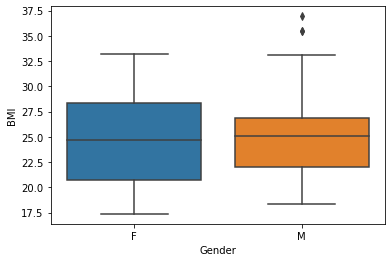

In [23]:
sns.boxplot(x='Gender',y='BMI', data=smokers)
plt.show()

# 10. 흡연자와 비흡연자의 BMI의 평균과 표준편차 구하기

In [24]:
BMI_mean = pd.DataFrame(smokers.groupby('Smoker')['BMI'].mean()).rename(columns={'BMI':'BMI_mean'})
BMI_std = pd.DataFrame(smokers.groupby('Smoker')['BMI'].std()).rename(columns={'BMI':'BMI_std'})

pd.DataFrame({'BMI_mean':BMI_mean['BMI_mean'],
             'BMI_std':BMI_std['BMI_std']})

,BMI_mean,BMI_std
Smoker,,
no,24.987056,3.875615
yes,24.850687,4.759915


# 11. 흡연자와 비흡연자의 BMI로 상자그림 그리기

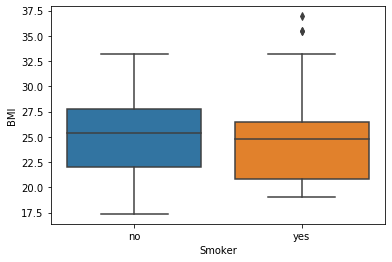

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='Smoker',y='BMI', data=smokers)
plt.show()